In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Generated Quantities Block

In [2]:
F = len("Dawid")
L = len("Bogon")

gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [3]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [4]:
df_ = pd.DataFrame(samples.draws_pd())
display(df_)

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,285.67400,286.0,286.0,285.0,307.0,262.0
1,0.0,0.0,74.01710,85.0,77.0,73.0,79.0,79.0
2,0.0,0.0,283.45600,305.0,276.0,301.0,238.0,262.0
3,0.0,0.0,81.71290,76.0,80.0,111.0,81.0,79.0
4,0.0,0.0,143.03300,133.0,136.0,142.0,140.0,143.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,132.91900,128.0,137.0,149.0,139.0,114.0
996,0.0,0.0,238.00900,251.0,237.0,222.0,238.0,229.0
997,0.0,0.0,55.68950,58.0,40.0,58.0,52.0,44.0
998,0.0,0.0,6.80582,10.0,6.0,6.0,9.0,7.0


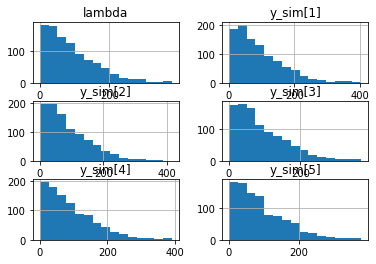

In [5]:
hist = df_[df_.columns[2:]].hist(bins=15)

## Excercise 2 - Constraints on the data 

In [6]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
df_bern1 = samp_bern1.draws_pd()
display(df_bern1.describe())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000
mean,-3.311543,0.913096,1.016426,1.396000,2.467000,0.0,3.814973,0.499949
std,0.752028,0.137535,0.076220,0.497741,1.194264,0.0,1.057928,0.220663
min,-9.860150,0.044281,0.903363,1.000000,1.000000,0.0,2.772640,0.021279
25%,-3.502105,0.886358,0.982711,1.000000,1.000000,0.0,3.064000,0.331457
50%,-3.022090,0.974397,1.023010,1.000000,3.000000,0.0,3.494840,0.501126
75%,-2.828597,1.000000,1.056725,2.000000,3.000000,0.0,4.202637,0.674419
max,-2.772590,1.000000,1.116320,3.000000,7.000000,0.0,11.787500,0.992721


In [7]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
df_bern2 = samp_bern2.draws_pd()
display(df_bern2.describe())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000
mean,-3.333411,0.915490,0.965685,1.373750,2.377000,0.0,3.831623,0.500060
std,0.772253,0.132495,0.073669,0.490531,1.067781,0.0,1.037804,0.224378
min,-10.227800,0.110388,0.862091,1.000000,1.000000,0.0,2.772590,0.006049
25%,-3.537350,0.889876,0.915557,1.000000,1.000000,0.0,3.088827,0.324256
50%,-3.035740,0.972526,0.974199,1.000000,3.000000,0.0,3.514190,0.503187
75%,-2.833087,1.000000,1.024328,2.000000,3.000000,0.0,4.259420,0.675326
max,-2.772590,1.000000,1.052250,3.000000,7.000000,0.0,10.493300,0.987875


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [8]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /root/ISZ_DA/Lab_02/samples/code_4-20230321185406_1.csv, /root/ISZ_DA/Lab_02/samples/code_4-20230321185406_2.csv, /root/ISZ_DA/Lab_02/samples/code_4-20230321185406_3.csv, /root/ISZ_DA/Lab_02/samples/code_4-20230321185406_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

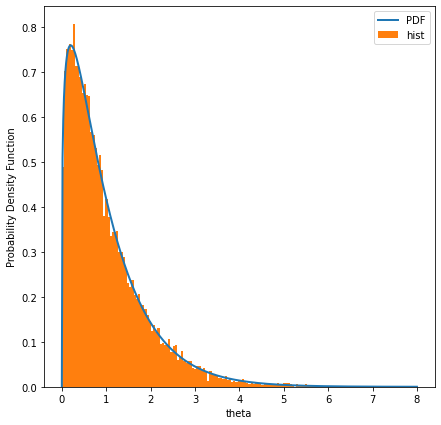

In [9]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 
df = out_gamma1.draws_pd()

plt.figure(figsize=(7, 7))
plt.plot(xs, pdfs, linewidth=2, label="PDF")

plt.hist(df["theta"], bins=160, density=True, label="hist")
plt.legend()
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

### Constrained parameter

In [10]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /root/ISZ_DA/Lab_02/samples/code_5-20230321185410_1.csv, /root/ISZ_DA/Lab_02/samples/code_5-20230321185410_2.csv, /root/ISZ_DA/Lab_02/samples/code_5-20230321185410_3.csv, /root/ISZ_DA/Lab_02/samples/code_5-20230321185410_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

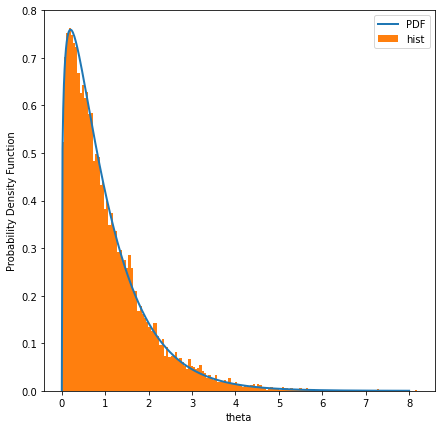

In [11]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

df = out_gamma2.draws_pd()

plt.figure(figsize=(7, 7))
plt.plot(xs, pdfs, linewidth=2, label="PDF")

plt.hist(df["theta"], bins=160, density=True, label="hist")
plt.legend()

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [12]:
model_tune = CmdStanModel(stan_file='code_6.stan')


y0 = 1# initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

# Using code_6 find the standard deviation of half_normal distribution, such that with 99% probability samples from it will be less than (F+L)/2
sigma = tunes.draws_pd().iloc[0, 2]
print(f"std: {sigma}")

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



std: 1.94112


## Excercise 5 - different methods of defining models


In [13]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 18082000 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


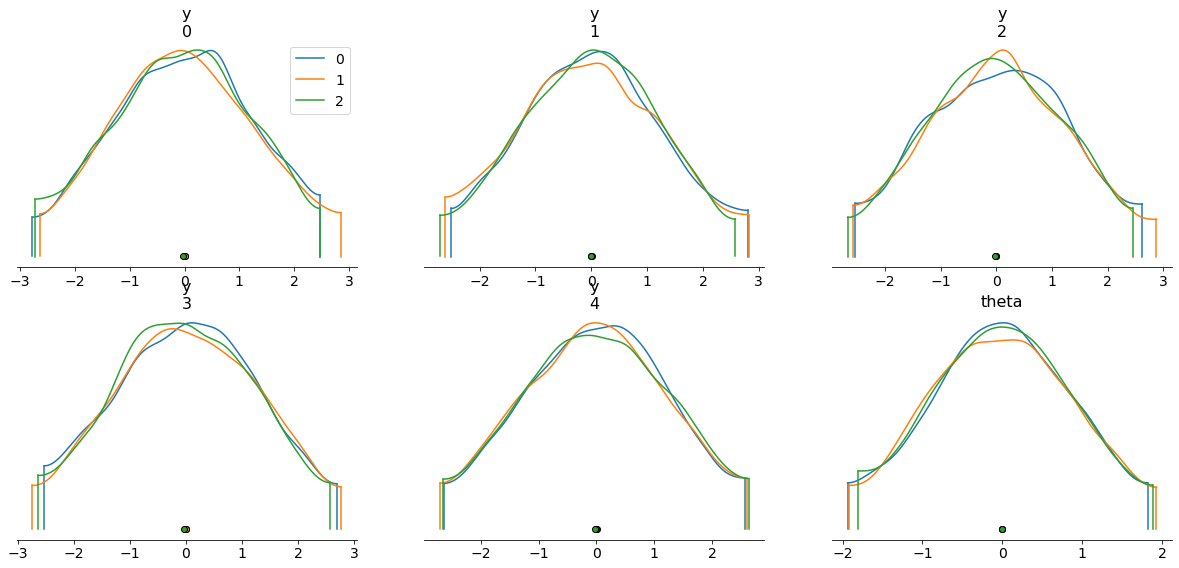

In [14]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing


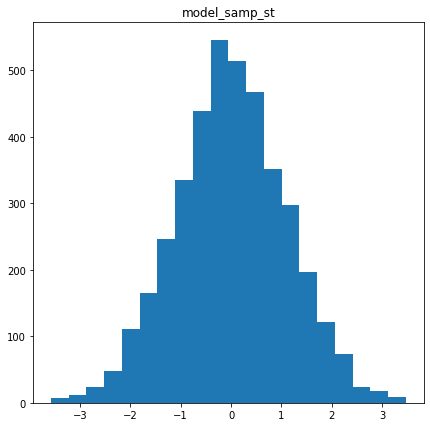

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing


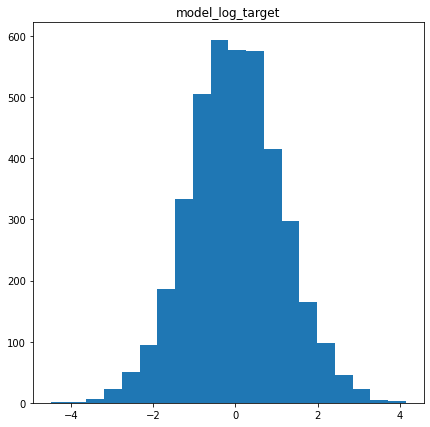

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [2] done processing


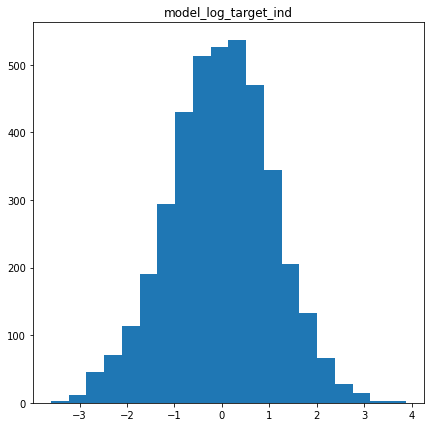

In [15]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
for result,title in zip([result_1, result_2, result_3],['model_samp_st', 'model_log_target', 'model_log_target_ind']):
    mean_of_y = model_gq.generate_quantities(data=data,
                                            mcmc_sample = result)

    # investigate the output and plot histogram of mean_y variable

    mean_of_y_df = mean_of_y.draws_pd()
    plt.figure(figsize=(7, 7))
    plt.hist(mean_of_y_df, bins=20)
    plt.title(str(title))
    plt.show()